<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA4/blob/master/Session8/EVA4S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [9]:
import sys
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/Colab Notebooks/EVA4/py_files_sid/']


In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/EVA4/py_files_sid/'
sys.path.append(path)

In [0]:
from imports_eva import *
import data_loaders as dl                         # Loading CIFAR10 data into train/test dataloaders
import model_file as mfile                        # ResNet18 Model architecture
import train_test_functions as ttfunc             # Model training and validation functions
import test_performance as tperform               # Class wise model accuracy and confusion matrix plot
import model_plots as mp                          # Plotting the Train/Test plots for loss and accuracy
import misclassified                              # Display misclassified images by the trained model

In [12]:
trainloader, testloader = dl.train_test_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = mfile.return_model().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         Dropout2d-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
         Dropout2d-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         Dropout2d-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
        Dropout2d-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1

In [15]:
from torch.optim.lr_scheduler import MultiStepLR
# model = mfile.return_model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)
#scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3)
scheduler = MultiStepLR(optimizer, milestones=[14,18], gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    ta, tl   =  ttfunc.train(model, device, trainloader, optimizer, epoch)
    ta1, tl1 =  ttfunc.test(model, device, testloader, classes)
    scheduler.step()
    print('')

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0870977640151978 Batch_id=390 Accuracy=41.45: 100%|██████████| 391/391 [01:09<00:00,  6.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5448/10000 (54.48%)


EPOCH: 2


Loss=0.9237354397773743 Batch_id=390 Accuracy=58.65: 100%|██████████| 391/391 [01:09<00:00,  6.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6737/10000 (67.37%)


EPOCH: 3


Loss=0.6811982989311218 Batch_id=390 Accuracy=68.15: 100%|██████████| 391/391 [01:09<00:00,  6.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7344/10000 (73.44%)


EPOCH: 4


Loss=0.743315577507019 Batch_id=390 Accuracy=73.07: 100%|██████████| 391/391 [01:10<00:00,  6.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7721/10000 (77.21%)


EPOCH: 5


Loss=0.7581570744514465 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [01:10<00:00,  6.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8003/10000 (80.03%)


EPOCH: 6


Loss=0.7263234853744507 Batch_id=390 Accuracy=78.68: 100%|██████████| 391/391 [01:09<00:00,  6.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7852/10000 (78.52%)


EPOCH: 7


Loss=0.6407915353775024 Batch_id=390 Accuracy=80.63: 100%|██████████| 391/391 [01:09<00:00,  6.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8222/10000 (82.22%)


EPOCH: 8


Loss=0.4340116083621979 Batch_id=390 Accuracy=81.67: 100%|██████████| 391/391 [01:10<00:00,  6.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8289/10000 (82.89%)


EPOCH: 9


Loss=0.4963441491127014 Batch_id=390 Accuracy=83.00: 100%|██████████| 391/391 [01:10<00:00,  6.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8362/10000 (83.62%)


EPOCH: 10


Loss=0.4665961265563965 Batch_id=390 Accuracy=84.16: 100%|██████████| 391/391 [01:09<00:00,  6.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8340/10000 (83.40%)


EPOCH: 11


Loss=0.3297498822212219 Batch_id=390 Accuracy=85.17: 100%|██████████| 391/391 [01:10<00:00,  6.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8409/10000 (84.09%)


EPOCH: 12


Loss=0.5120591521263123 Batch_id=390 Accuracy=85.86: 100%|██████████| 391/391 [01:10<00:00,  6.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8467/10000 (84.67%)


EPOCH: 13


Loss=0.3424359858036041 Batch_id=390 Accuracy=86.84: 100%|██████████| 391/391 [01:09<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8481/10000 (84.81%)


EPOCH: 14


Loss=0.2278444766998291 Batch_id=390 Accuracy=87.45: 100%|██████████| 391/391 [01:09<00:00,  6.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8456/10000 (84.56%)


EPOCH: 15


Loss=0.15181602537631989 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [01:09<00:00,  6.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8817/10000 (88.17%)


EPOCH: 16


Loss=0.18561486899852753 Batch_id=390 Accuracy=91.79: 100%|██████████| 391/391 [01:10<00:00,  6.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8843/10000 (88.43%)


EPOCH: 17


Loss=0.30170923471450806 Batch_id=390 Accuracy=92.33: 100%|██████████| 391/391 [01:09<00:00,  6.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8875/10000 (88.75%)


EPOCH: 18


Loss=0.2980807423591614 Batch_id=390 Accuracy=92.71: 100%|██████████| 391/391 [01:09<00:00,  6.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8877/10000 (88.77%)


EPOCH: 19


Loss=0.15129873156547546 Batch_id=390 Accuracy=93.08: 100%|██████████| 391/391 [01:10<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8872/10000 (88.72%)


EPOCH: 20


Loss=0.23219139873981476 Batch_id=390 Accuracy=93.10: 100%|██████████| 391/391 [01:10<00:00,  6.24it/s]



Test set: Average loss: 0.0026, Accuracy: 8876/10000 (88.76%)




------------------------------------------------------------
Model accuracy on 10000 test images: 88.76%
------------------------------------------------------------
 
Category   - Accuracy
plane      - 90.10
car        - 94.80
bird       - 85.20
cat        - 74.10
deer       - 89.40
dog        - 83.70
frog       - 91.20
horse      - 91.30
ship       - 94.20
truck      - 93.60
 


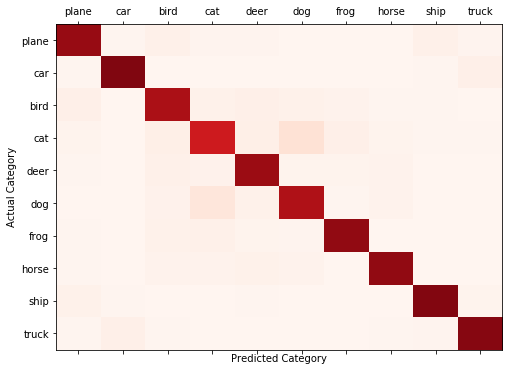

In [16]:
tperform.test_performance(model, testloader, device, classes)

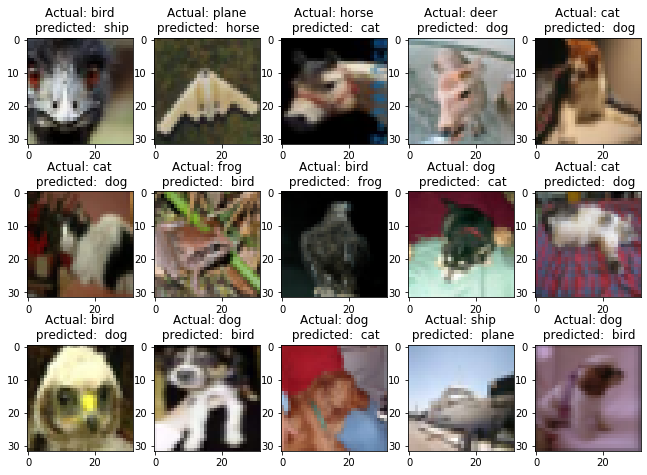

In [18]:
images, actuals, preds = misclassified.test_misclassified(model,device,testloader)
misclassified.plot_images(images, actuals, preds, classes)